In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Point
from glob import glob 

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
def GetContri(path):
    results = [y for x in os.walk(path) for y in glob(os.path.join(x[0], 'Readme.md'))]
    Name = []
    Pos = []
    lon = []
    lat = []
    for eachContri in results:
        with open(eachContri) as FileContent:
            for line in FileContent: 
                if line.startswith( 'pos: ' ):
                    Coordon = line.replace('pos: ',"").strip()
                    Pos.append(Coordon)
                    X = float(Coordon.split(",")[0])
                    Y = float(Coordon.split(",")[1])
                    lon.append(X)
                    lat.append(Y)
                if line.startswith( 'who: ' ):
                    Name.append(line.replace('who: ',"").strip())
    return Name,Pos,lon,lat

In [3]:
Contrib = GetContri("./")
NbContrib = np.shape(Contrib)[1]

In [4]:
df = pd.DataFrame(data=Contrib, index=["who", "pos","lat","lon"]).T
df

,who,pos,lat,lon
0,Erick,"37.4299358,-122.1693014",37.4299,-122.169
1,Felix,"49.1630266,11.656955",49.163,11.657
2,Jan,"52.520008,13.404954",52.52,13.405
3,Arash,"41.6997562,-86.2384502",41.6998,-86.2385
4,Song,"37.408812, 127.117093",37.4088,127.117
...,...,...,...,...
66,Harold,"32.3006925,-90.874961",32.3007,-90.875
67,William,"40.804496782,-73.957162838",40.8045,-73.9572
68,Kim,"37.433347,127.162363",37.4333,127.162
69,Stephanie,"42.4090619,-71.055754",42.4091,-71.0558


In [5]:
geometry = [Point(xy) for xy in zip(df["lat"],df["lon"])]
crs={"init": "epsg:4326"}
gdf = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)


In [ ]:

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gdf.to_crs(epsg=3857)
#gdf

In [1]:
ax = gdf.plot(
    color='red', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [9]:
# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 10000000.0,
#              lat_0=0, lon_0=0)

eq_map = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=60,resolution='c')
#eq_map.drawcoastlines()
#eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
#eq_map.drawmeridians(np.arange(0, 360, 30))
#eq_map.drawparallels(np.arange(-90, 90, 30))
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, marker='x', color='r', markersize=15,mew=3)

title_string = "Around "+str(NbContrib)+" contributors and users around the world" 
plt.title(title_string)
plt.savefig("map.jpg", bbox_inches='tight')
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 1152x864 with 0 Axes>

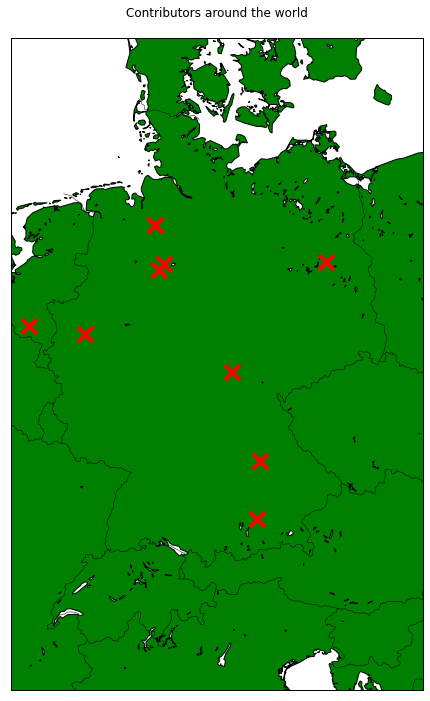

In [7]:
# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='merc', resolution = 'i',area_thresh = 1,
llcrnrlat=45.0,
llcrnrlon=5.0,
urcrnrlat=56.0,
urcrnrlon=16)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors around the world\n" 
plt.title(title_string)
plt.savefig("germany.jpg", bbox_inches='tight')
plt.show()

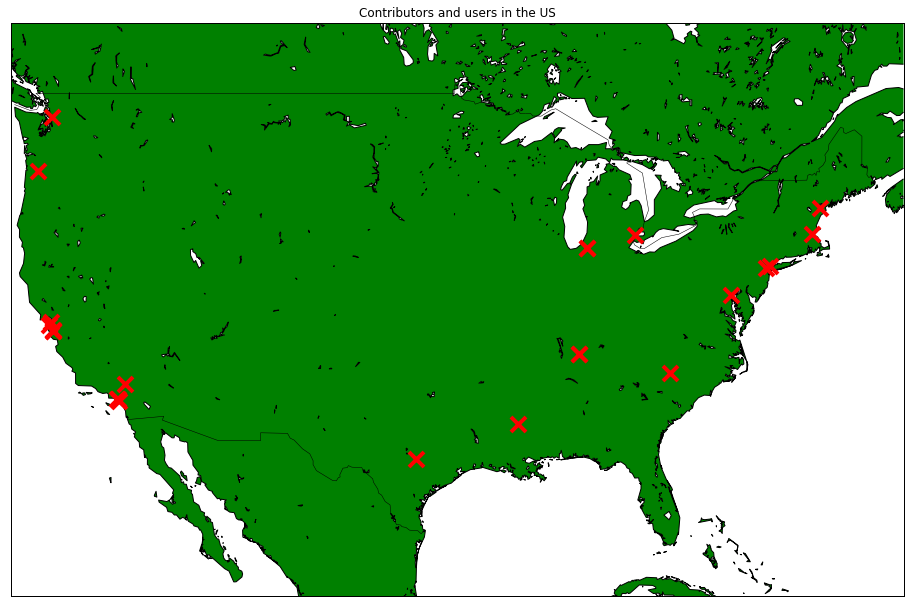

In [8]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 37
Lo = -95
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in the US" 
plt.title(title_string)
plt.savefig("us.jpg", bbox_inches='tight')
plt.show()

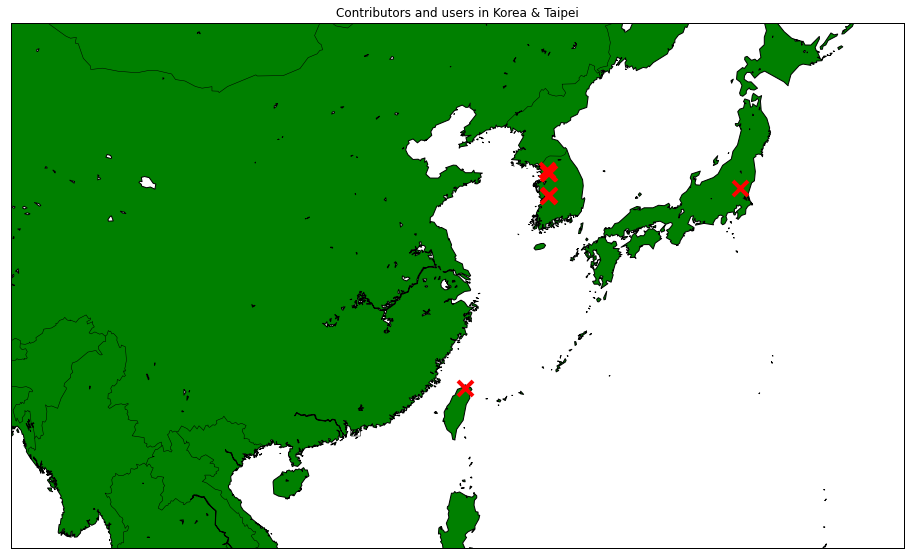

In [9]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 30
Lo = 121
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in Korea & Taipei" 
plt.title(title_string)
plt.savefig("asia.jpg", bbox_inches='tight')
plt.show()